In [53]:
# prompt: change PlayType_description to Event

# Rename the 'PlayType_description' column to 'Event'
real_df = real_df.rename(columns={'Commentary': 'Event'})

# Print the updated DataFrame0
mega_df


,Event,Commentary
0,2,"good length, 151kph, pitching outside leg, hit..."
1,2,tossed up but way wide of off and called
2,2,"spins down the leg side, signaled a wide."
3,2,low full toss at leg stump. Looks for the flic...
4,2,"length but down the leg side, starts with a wide"
...,...,...
79995,3,"back of a length, takes the thigh pad"
79996,3,"fullish and straight, seaming back in, defende..."
79997,3,shortens his length after he sees Smith coming...
79998,3,"beats the forward prod to hit the pad, sharp t..."


In [ ]:
pip install tensorflow

In [ ]:
pip install matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [10]:
real_df = pd.read_csv('base_train.csv')

In [11]:
real_df.head()

,Event,taken,pulls,length,call,quick,bowled,blocked,driven,alone,...,mid-off,full,fired,around,though,hits,worked,point,hard,review
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
real_df.describe()

,Event,taken,pulls,length,call,quick,bowled,blocked,driven,alone,...,mid-off,full,fired,around,though,hits,worked,point,hard,review
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.750000,0.023537,0.011825,0.260675,0.042500,0.029337,0.018288,0.005812,0.018200,0.019412,...,0.022638,0.18925,0.009687,0.041662,0.020012,0.025850,0.010138,0.065275,0.021812,0.024362
std,1.479029,0.151604,0.108099,0.439006,0.201728,0.168752,0.133990,0.076018,0.133675,0.137971,...,0.148746,0.39171,0.097948,0.199818,0.140044,0.158689,0.100174,0.247012,0.146072,0.154173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# Separate samples by event
event_dfs = [real_df[real_df['Event'] == event] for event in real_df['Event'].unique()]

# Downsample or upsample to 5000 samples per event
resampled_dfs = [resample(event_df, replace=(len(event_df) < 5000), n_samples=5000, random_state=50) 
                 for event_df in event_dfs]

# Concatenate resampled dataframes
balanced_df = pd.concat(resampled_dfs)

# Split into features and target
y = balanced_df['Event']
X = balanced_df.drop('Event', axis=1)

In [14]:
from sklearn.decomposition import PCA
import numpy as np

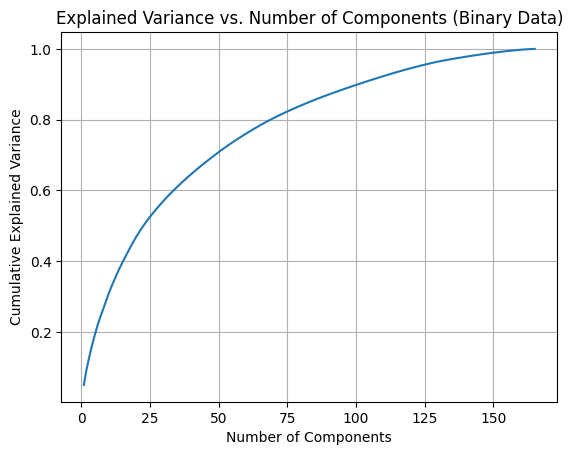

Optimal number of components: 69


In [15]:
# Assuming 'new_df' is your DataFrame and 'filtered_unique_words' is a list of binary columns

# Apply PCA without scaling
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance vs. number of components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components (Binary Data)')
plt.grid()
plt.show()

# Choose the number of components based on desired explained variance threshold
desired_variance = 0.80  # Set your desired threshold (e.g., 95%)
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= desired_variance) + 1

print(f"Optimal number of components: {n_components}")

In [39]:
# prompt: get top 70 important column names using pca




# Apply PCA
pca = PCA(n_components=68)  # Choose the number of components (70 in this case)
pca.fit(X)

# Get the feature importances (loadings)
feature_importances = np.abs(pca.components_)

# Calculate the average importance across all components for each feature
avg_feature_importances = np.mean(feature_importances, axis=0)

# Get the indices of the top 70 most important features
top_feature_indices = np.argsort(avg_feature_importances)[::-1][:68]

# Get the names of the top 70 most important features
top_feature_names = [X.columns[i] for i in top_feature_indices]

print("Top 68 important column names:")
print(top_feature_names)


Top 68 important column names:
['deep', 'fine', 'pull', 'edge', 'goes', 'line', 'square', 'top', 'point', 'good', 'across', 'outside', 'looks', 'towards', "'s", 'pitch', 'left', 'flick', 'cut', 'forward', 'stumps', 'hit', 'drive', 'stump', 'full', 'short', 'turn', 'bat', 'side', 'sweep', 'high', 'right', 'leg', 'time', 'length', 'bounce', 'keeper', 'middle', 'one', 'catch', 'cover', 'pad', 'well', 'man', 'take', 'delivery', 'back', 'shot', 'straight', 'ca', 'misses', 'around', 'long', 'call', 'wicket', 'inside', 'ends', 'toss', 'end', 'air', 'go', 'kph', 'foot', 'front', 'past', 'behind', 'defend', 'low']


In [16]:
top_feature_names

NameError: name 'top_feature_names' is not defined

In [17]:
# Get the names of the top 70 most important features
top_feature_names = [X.columns[i] for i in top_feature_names]

print("Top 68 important column names:")
print(top_feature_names)


NameError: name 'top_feature_names' is not defined

In [9]:
# prompt: now only keep the columns in top_feature_names and drop rest in new_df

# Keep only the columns in top_feature_names and drop the rest
real_df = balanced_df[['Event'] + top_feature_names]

# Print the updated DataFrame
real_df


NameError: name 'top_feature_names' is not defined

In [18]:
print(real_df.columns)

Index(['Event', 'taken', 'pulls', 'length', 'call', 'quick', 'bowled',
       'blocked', 'driven', 'alone',
       ...
       'mid-off', 'full', 'fired', 'around', 'though', 'hits', 'worked',
       'point', 'hard', 'review'],
      dtype='object', length=166)


In [19]:
y = real_df['Event']
X = real_df.drop('Event', axis=1)

In [20]:
y.unique()

array([2, 0, 1, 4])

In [21]:
y.replace(4,3,inplace=True)

In [22]:
len(y)

80000

In [57]:
from sklearn.metrics import f1_score

Epoch 1/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.2469 - loss: 1.3954 - val_accuracy: 0.2700 - val_loss: 1.3828
Epoch 2/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.2912 - loss: 1.3790 - val_accuracy: 0.3300 - val_loss: 1.3745
Epoch 3/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.2927 - loss: 1.3736 - val_accuracy: 0.3800 - val_loss: 1.3535
Epoch 4/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3298 - loss: 1.3595 - val_accuracy: 0.4117 - val_loss: 1.3075
Epoch 5/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3495 - loss: 1.3076 - val_accuracy: 0.4400 - val_loss: 1.2336
Epoch 6/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.3914 - loss: 1.2721 - val_accuracy: 0.4500 - val_loss: 1.1903
Epoch 7/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.3942 - loss: 1.2564 - val_accuracy: 0.4500 - val_loss: 1.1572
Epoch 8/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.4166 - loss: 1

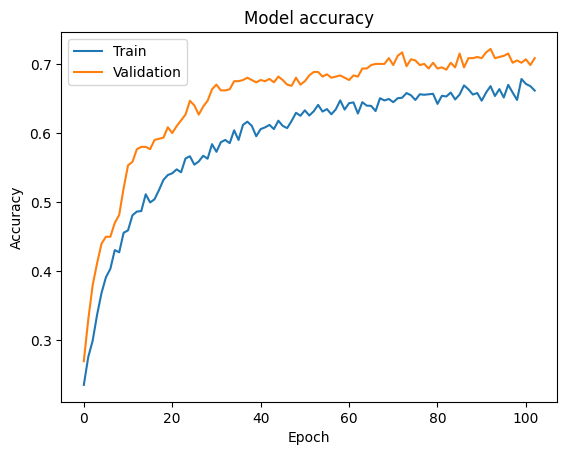

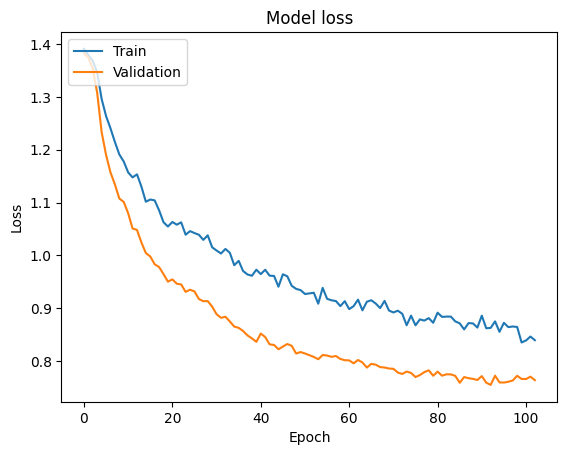

In [353]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=103, batch_size=8,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and y are defined

# Apply PCA to reduce to 2 components
pca = PCA(n_components=70)
X_pca = pca.fit_transform(X)

# Define colors for each category
colors = ['red', 'green', 'blue', 'purple']  # Customize colors as desired



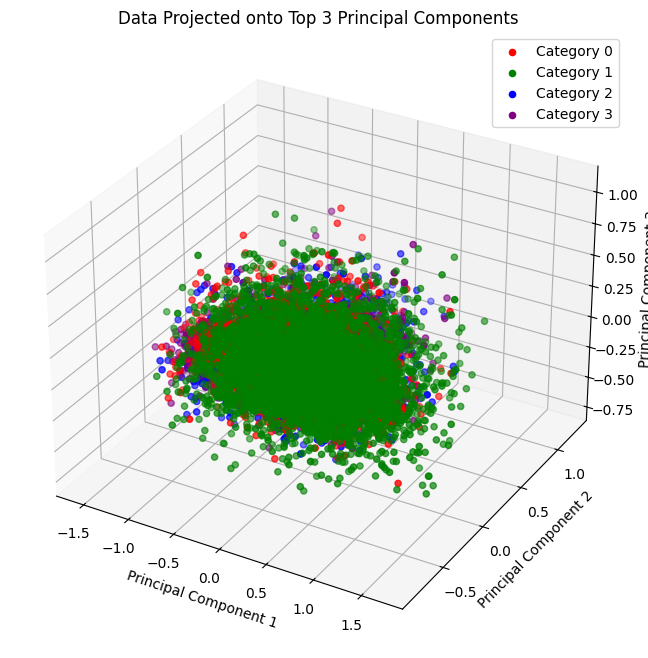

In [94]:


# Define colors for each category
colors = ['red', 'green', 'blue', 'purple']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for category in range(4):
    category_indices = y == category
    ax.scatter(X_pca[category_indices, 6], X_pca[category_indices,55], X_pca[category_indices, 69],
               c=colors[category], label=f'Category {category}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data Projected onto Top 3 Principal Components')
ax.legend()

plt.show()

Epoch 1/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2952 - loss: 1.3740 - val_accuracy: 0.4250 - val_loss: 1.3053 - learning_rate: 0.0010
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.3666 - loss: 1.3109 - val_accuracy: 0.4617 - val_loss: 1.1945 - learning_rate: 0.0010
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4133 - loss: 1.2674 - val_accuracy: 0.5450 - val_loss: 1.1125 - learning_rate: 0.0010
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.4874 - loss: 1.1824 - val_accuracy: 0.6050 - val_loss: 1.0279 - learning_rate: 0.0010
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5343 - loss: 1.1087 - val_accuracy: 0.6250 - val_loss: 0.9596 - learning_rate: 0.0010
Epoch 6/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5357 - loss: 1.0978 - val_accuracy: 0.6450 - val_loss: 0.9292 - learning_rate: 0.0010
Epoch 7/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5587 - loss: 1.0656 - 

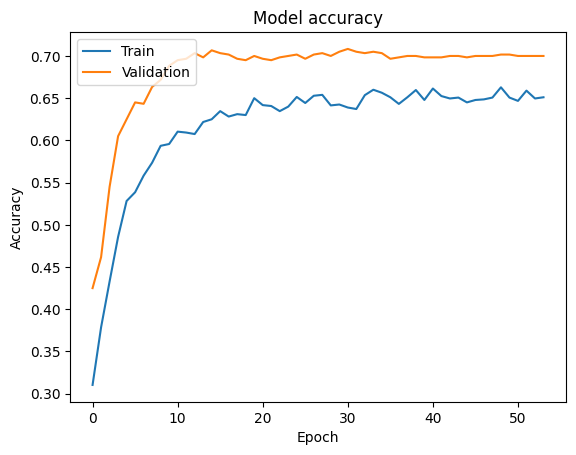

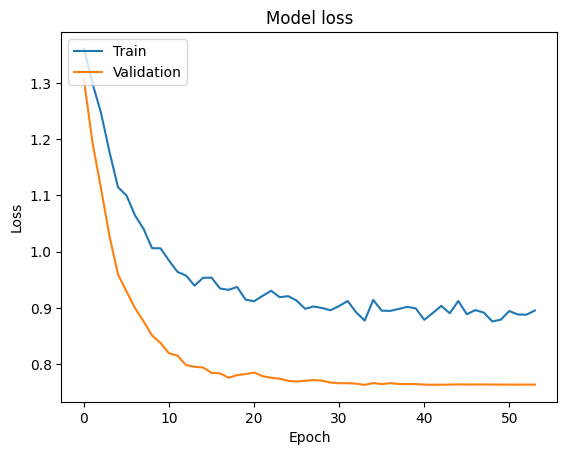

In [376]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=30,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=103, batch_size=8,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.2882 - loss: 1.3784 - val_accuracy: 0.4733 - val_loss: 1.2663
Epoch 2/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.4048 - loss: 1.2697 - val_accuracy: 0.5690 - val_loss: 1.0495
Epoch 3/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.4753 - loss: 1.1594 - val_accuracy: 0.5890 - val_loss: 0.9993
Epoch 4/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.5006 - loss: 1.1148 - val_accuracy: 0.6073 - val_loss: 0.9644
Epoch 5/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.5230 - loss: 1.0882 - val_accuracy: 0.6127 - val_loss: 0.9395
Epoch 6/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.5297 - loss: 1.0643 - val_accuracy: 0.6177 - val_loss: 0.9309
Epoch 7/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.5420 - loss: 1.0446 - val_accuracy: 0.6103 - val_loss: 0.9342
Epoch 8/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 

NameError: name 'f1_score' is not defined

Epoch 1/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 1.3333 - val_accuracy: 0.5437 - val_loss: 1.1815 - learning_rate: 0.0010
Epoch 2/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4974 - loss: 1.1762 - val_accuracy: 0.6383 - val_loss: 1.0277 - learning_rate: 0.0010
Epoch 3/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5670 - loss: 1.0496 - val_accuracy: 0.6603 - val_loss: 0.9261 - learning_rate: 0.0010
Epoch 4/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5927 - loss: 0.9992 - val_accuracy: 0.6740 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 5/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.6126 - loss: 0.9585 - val_accuracy: 0.6820 - val_loss: 0.8412 - learning_rate: 0.0010
Epoch 6/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6257 - loss: 0.9298 - val_accuracy: 0.6820 - val_loss: 0.8228 - learning_rate: 0.0010
Epoch 7/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6425 - loss: 0.89

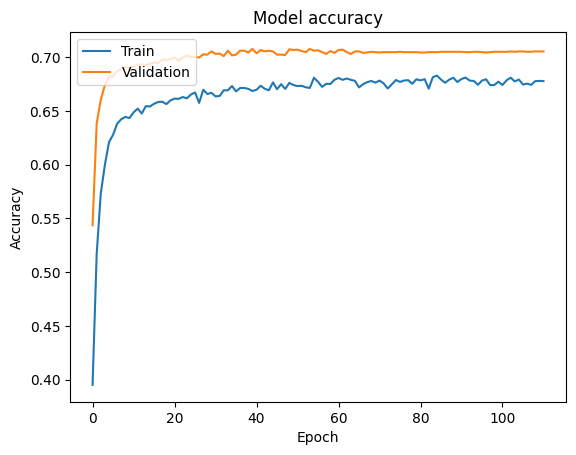

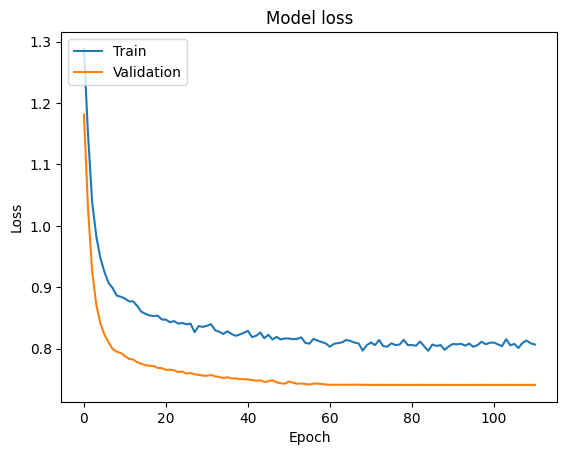

In [84]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(37, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(15, activation='relu'),
           layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=125, batch_size=300,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.3697 - val_accuracy: 0.5103 - val_loss: 1.2124 - learning_rate: 0.0010
Epoch 2/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.5025 - loss: 1.1781 - val_accuracy: 0.6343 - val_loss: 1.0077 - learning_rate: 0.0010
Epoch 3/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.5970 - loss: 1.0240 - val_accuracy: 0.6627 - val_loss: 0.8873 - learning_rate: 0.0010
Epoch 4/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6317 - loss: 0.9376 - val_accuracy: 0.6723 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 5/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6339 - loss: 0.9106 - val_accuracy: 0.6760 - val_loss: 0.8190 - learning_rate: 0.0010
Epoch 6/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.6395 - loss: 0.8969 - val_accuracy: 0.6827 - val_loss: 0.8063 - learning_rate: 0.0010
Epoch 7/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.6564 - loss: 0.87

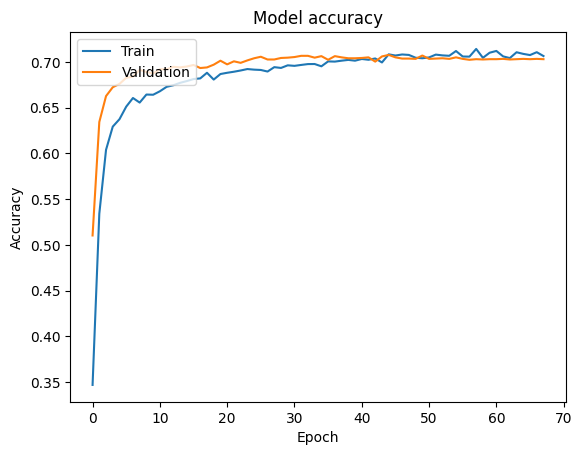

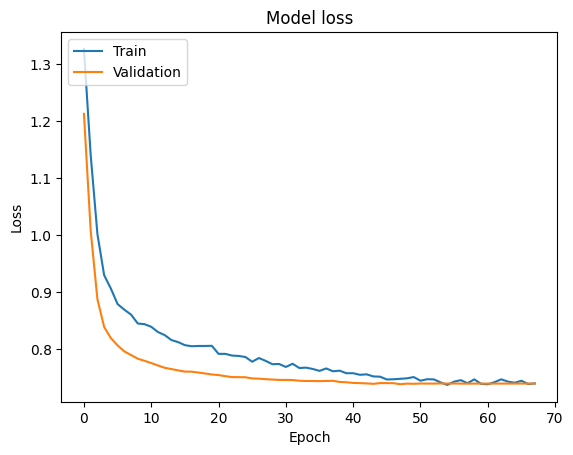

In [87]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.1),
    layers.Dense(59, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=300,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [31]:
df=pd.read_csv('base_train.csv')

In [32]:
df['Event']=df['Event'].replace(4,3,inplace=True)

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1155/3006424286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Event']=df['Event'].replace(4,3,inplace=True)


In [33]:
# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import LSTM, Bidirectional
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_4052/3165380915.py:1: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lstm.csv')


Epoch 1/15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 172s 304ms/step - accuracy: 0.3716 - loss: 1.2799 - val_accuracy: 0.4877 - val_loss: 1.0464
Epoch 2/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 174s 311ms/step - accuracy: 0.4840 - loss: 1.0509 - val_accuracy: 0.6407 - val_loss: 0.9269
Epoch 3/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 177s 316ms/step - accuracy: 0.6266 - loss: 0.8732 - val_accuracy: 0.7427 - val_loss: 0.6760
Epoch 4/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 171s 306ms/step - accuracy: 0.7495 - loss: 0.6608 - val_accuracy: 0.7797 - val_loss: 0.5859
Epoch 5/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 174s 312ms/step - accuracy: 0.7826 - loss: 0.5897 - val_accuracy: 0.8015 - val_loss: 0.5402
Epoch 6/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 165s 294ms/step - accuracy: 0.8079 - loss: 0.5357 - val_accuracy: 0.8133 - val_loss: 0.5086
Epoch 7/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 165s 295ms/step - accuracy: 0.8152 - loss: 0.5074 - val_accuracy: 0.8238 - val_loss: 0.4901
Epoch 8/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 120s 214ms/step - accuracy: 0.8289 - loss: 0.47

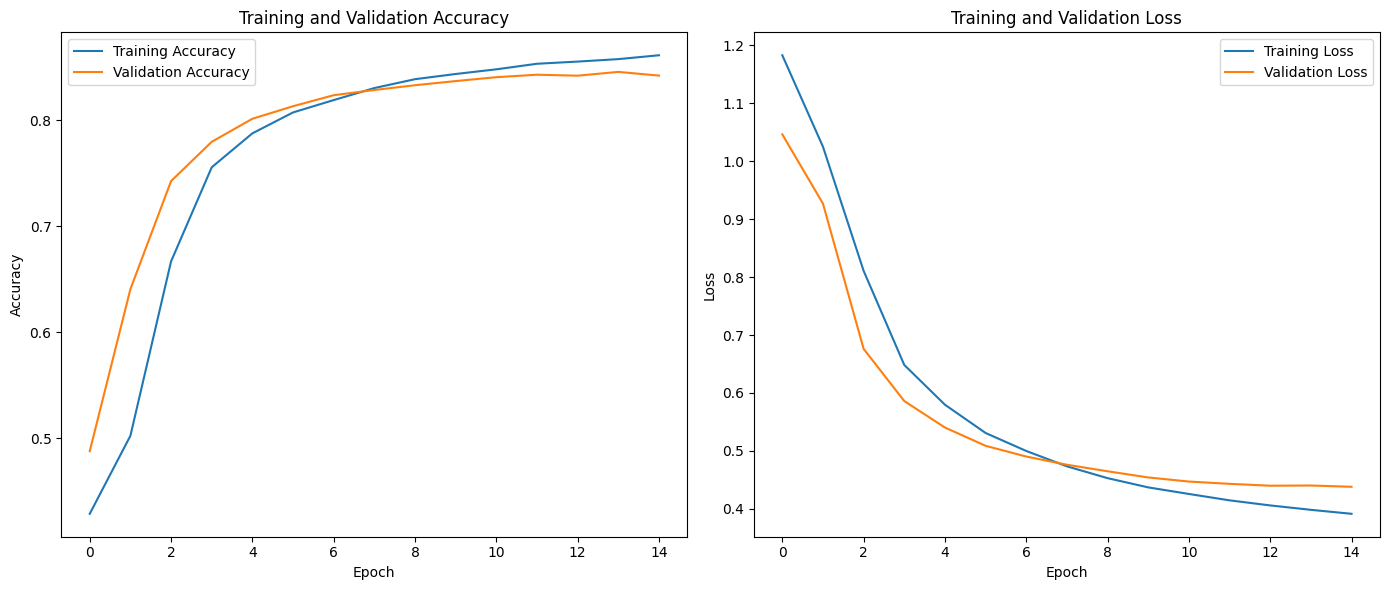

Test Set Accuracy: 0.8330
Test Set Loss: 0.4556


In [3]:
df=pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ... (rest of your model building and training code)
# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length)) # Add Embedding layer
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False))) # Input shape is automatically inferred
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification
# 6. Compile the model
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=100, verbose=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2390/4120461694.py:11: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Validation Accuracy: 0.7997

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      3000
           1       0.84      0.93      0.88      3000
           2       0.81      0.80      0.81      3000
           3       0.75      0.74      0.75      3000

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000

Test Set Accuracy: 0.7944

Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      3000
           1       0.83      0.92      0.87      3000
           2       0.80      0.80      0.80      3000
           3       0.75      0.73      0.74      3000

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79     12000
weighted avg       0.79      0.79      0.79     12000



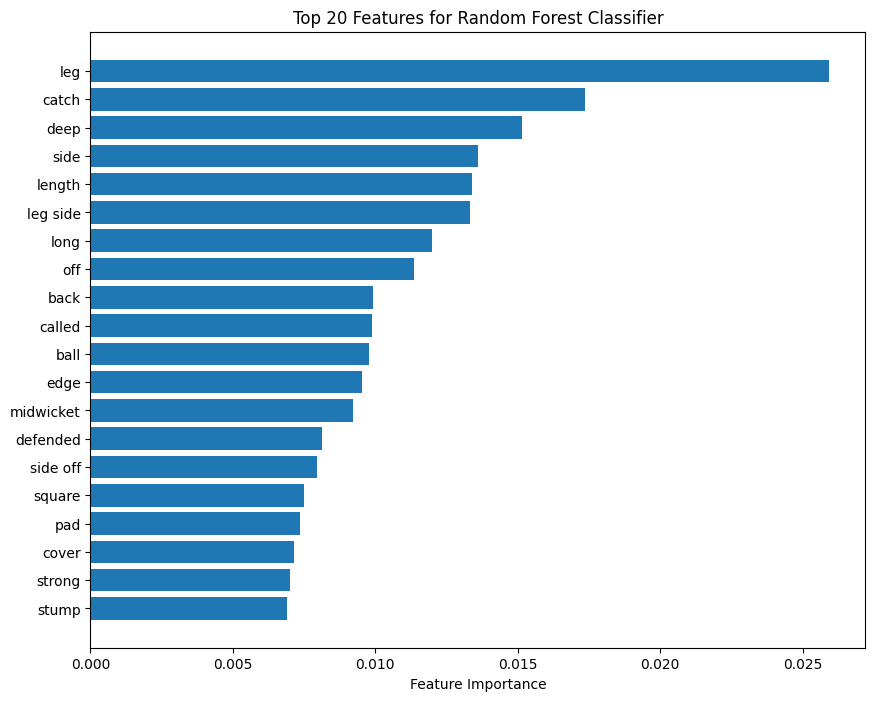

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# 4. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# 6. Evaluate on validation set
y_val_pred = rfc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# 7. Evaluate on test set
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Plot feature importance (top 20)
importances = rfc.feature_importances_
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [tfidf_vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Features for Random Forest Classifier")
plt.show()


In [6]:
df['PlayType_description'].unique()

array([2, 0, 1, 3])

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2390/4242554074.py:12: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Accuracy: 0.7389

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69      3000
           1       0.85      0.86      0.85      3000
           2       0.73      0.73      0.73      3000
           3       0.64      0.73      0.68      3000

    accuracy                           0.74     12000
   macro avg       0.74      0.74      0.74     12000
weighted avg       0.74      0.74      0.74     12000

Test Set Accuracy: 0.7296

Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      3000
           1       0.84      0.85      0.84      3000
           2       0.73      0.73      0.73      3000
           3       0.62      0.71      0.66      3000

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



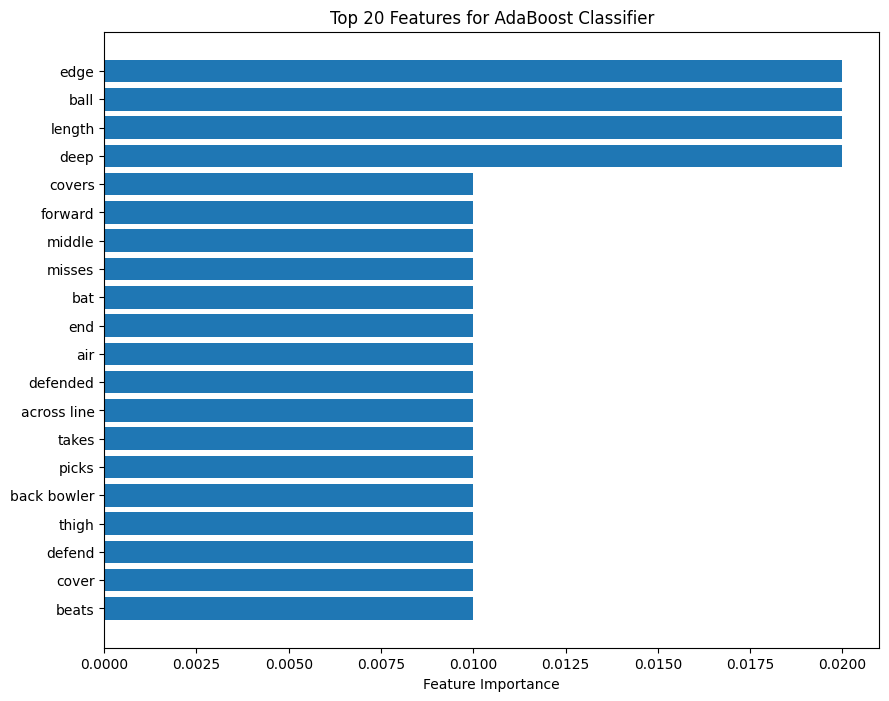

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# 4. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Initialize and train the AdaBoost Classifier with Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=100,min_samples_split=80)  # Stumps for AdaBoost
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=150, random_state=42)
adaboost.fit(X_train, y_train)

# 6. Evaluate on validation set
y_val_pred = adaboost.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# 7. Evaluate on test set
y_test_pred = adaboost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Plot feature importance (top 20)
importances = adaboost.feature_importances_
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [tfidf_vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Features for AdaBoost Classifier")
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the dataset
df = pd.read_csv('lstm.csv')

# 2. Prepare the data
X = df['Commentary'].astype(str).tolist()  # Extract commentary text
y = df['PlayType_description'].values  # Extract target variable

# 3. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1, 2))  # Limit to top 5000 features
X_tfidf = vectorizer.fit_transform(X).toarray()  # Convert to array

# 5. Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 6. Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_val)

# 8. Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Optionally evaluate on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2390/2425521625.py:9: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Validation Accuracy: 0.7997
Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the dataset
df = pd.read_csv('lstm.csv')

# 2. Prepare the data
X = df['Commentary'].astype(str).tolist()  # Extract commentary text
y = df['PlayType_description'].values  # Extract target variable

# 3. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_tfidf = vectorizer.fit_transform(X).toarray()  # Convert to array

# 5. Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 6. Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_val)

# 8. Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Optionally evaluate on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2390/2429363468.py:9: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Validation Accuracy: 0.8040
Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the dataset
df = pd.read_csv('lstm.csv')

# 2. Prepare the data
X = df['Commentary'].astype(str).tolist()  # Extract commentary text
y = df['PlayType_description'].values  # Extract target variable

# 3. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_tfidf = vectorizer.fit_transform(X).toarray()  # Convert to array

# 5. Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 6. Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_val)

# 8. Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Optionally evaluate on the test set



/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2390/730465998.py:9: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Validation Accuracy: 0.8331
Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [15]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Test Set Accuracy: 0.8268


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2390/1360136385.py:13: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Validation Accuracy: 0.8493

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3000
           1       0.92      0.94      0.93      3000
           2       0.86      0.84      0.85      3000
           3       0.79      0.80      0.79      3000

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Test Set Accuracy: 0.8408

Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      3000
           1       0.91      0.92      0.92      3000
           2       0.86      0.84      0.85      3000
           3       0.77      0.79      0.78      3000

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



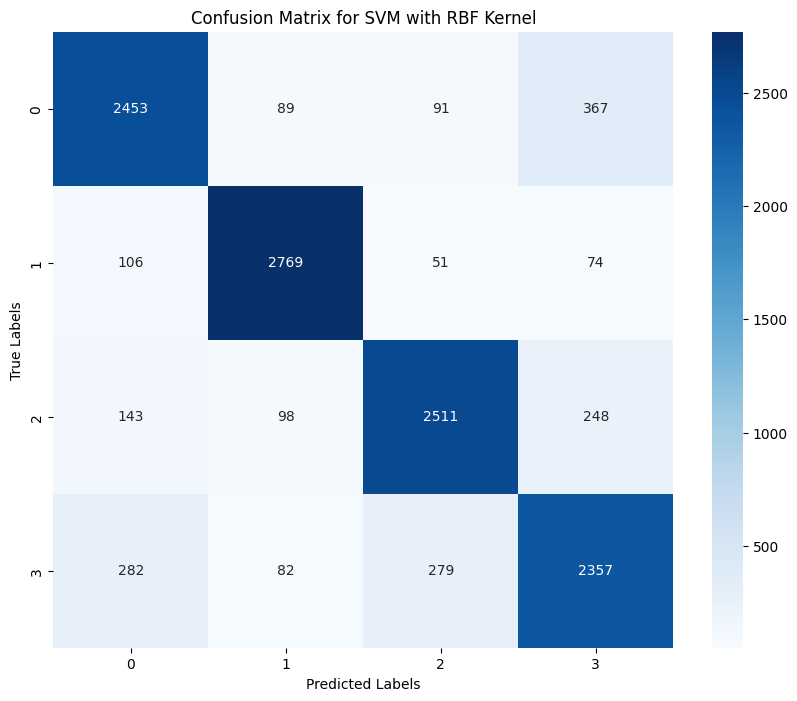

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# 4. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Initialize and train the SVM Classifier with RBF kernel
svm_rbf = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# 6. Evaluate on validation set
y_val_pred = svm_rbf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# 7. Evaluate on test set
y_test_pred = svm_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Plotting Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1390/3715262664.py:14: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')



Evaluating with 3-fold cross-validation...
Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


534/534 ━━━━━━━━━━━━━━━━━━━━ 80s 148ms/step - accuracy: 0.5679 - loss: 1.2615 - val_accuracy: 0.7893 - val_loss: 0.6507
Epoch 2/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 711s 1s/step - accuracy: 0.8061 - loss: 0.6217 - val_accuracy: 0.8165 - val_loss: 0.5639
Epoch 3/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 85s 159ms/step - accuracy: 0.8315 - loss: 0.5409 - val_accuracy: 0.8149 - val_loss: 0.5633
Epoch 4/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 85s 159ms/step - accuracy: 0.8458 - loss: 0.4942 - val_accuracy: 0.8292 - val_loss: 0.5163
Epoch 5/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 86s 161ms/step - accuracy: 0.8550 - loss: 0.4619 - val_accuracy: 0.8349 - val_loss: 0.4952
Epoch 6/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 86s 161ms/step - accuracy: 0.8579 - loss: 0.4530 - val_accuracy: 0.8339 - val_loss: 0.5103
Epoch 7/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 91s 170ms/step - accuracy: 0.8627 - loss: 0.4399 - val_accuracy: 0.8376 - val_loss: 0.4845
Epoch 8/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 96s 179ms/step - accuracy: 0.8676 - loss: 0.4273 - val_accuracy

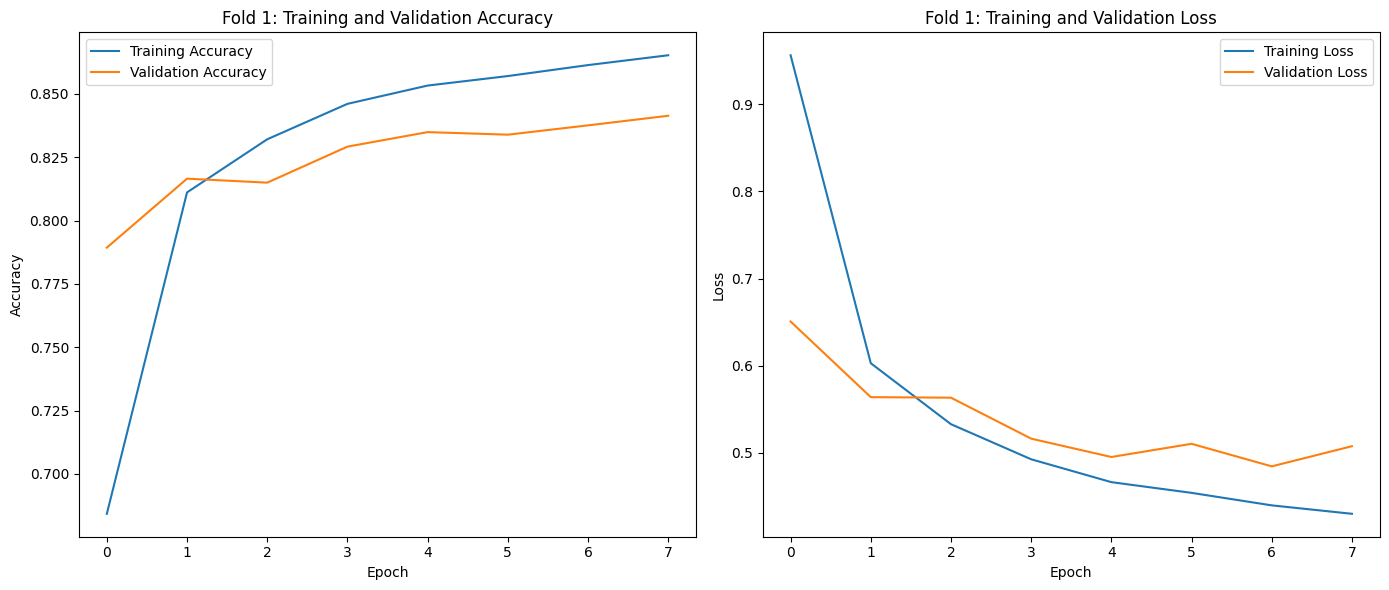

Epoch 1/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 89s 165ms/step - accuracy: 0.5493 - loss: 1.2818 - val_accuracy: 0.7926 - val_loss: 0.6399
Epoch 2/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 96s 180ms/step - accuracy: 0.8049 - loss: 0.6247 - val_accuracy: 0.7894 - val_loss: 0.6144
Epoch 3/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 99s 185ms/step - accuracy: 0.8299 - loss: 0.5358 - val_accuracy: 0.8255 - val_loss: 0.5407
Epoch 4/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 98s 183ms/step - accuracy: 0.8432 - loss: 0.5005 - val_accuracy: 0.8241 - val_loss: 0.5197
Epoch 5/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 102s 191ms/step - accuracy: 0.8426 - loss: 0.5020 - val_accuracy: 0.8364 - val_loss: 0.5083
Epoch 6/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 101s 190ms/step - accuracy: 0.8556 - loss: 0.4564 - val_accuracy: 0.8340 - val_loss: 0.5091
Epoch 7/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 102s 192ms/step - accuracy: 0.8625 - loss: 0.4352 - val_accuracy: 0.8305 - val_loss: 0.5188
Epoch 8/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 99s 185ms/step - accuracy: 0.8602 - loss: 0.4533

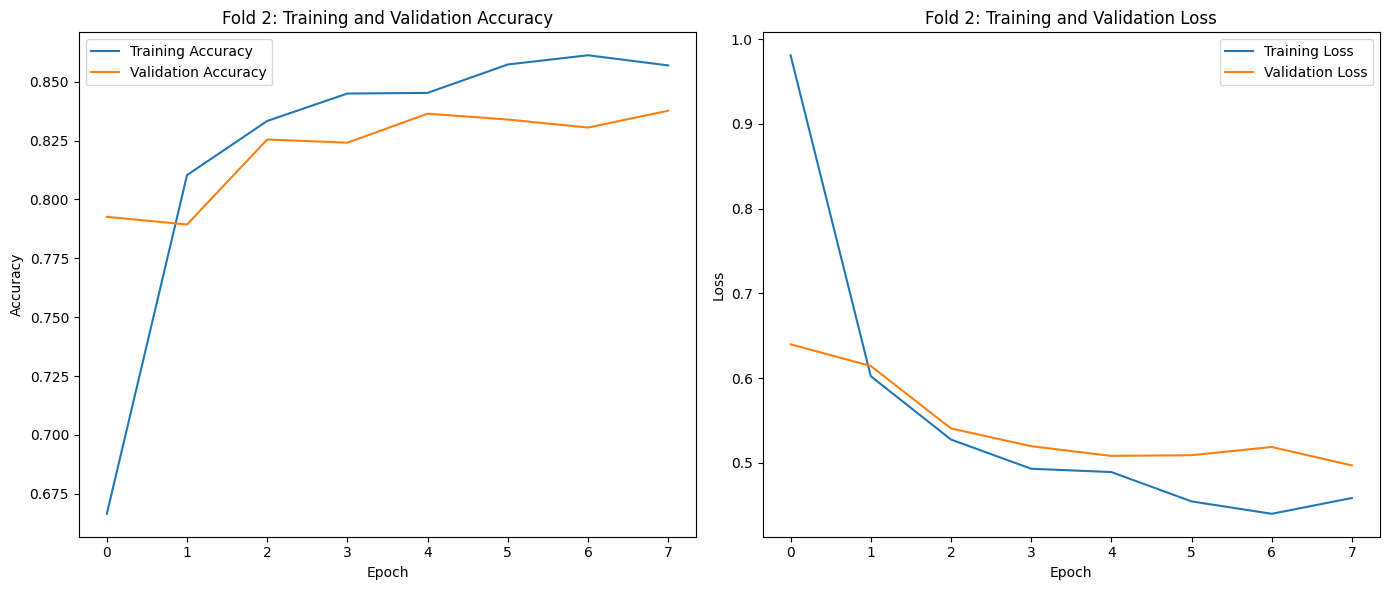

Epoch 1/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 97s 179ms/step - accuracy: 0.5669 - loss: 1.2625 - val_accuracy: 0.7771 - val_loss: 0.6676
Epoch 2/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 151s 284ms/step - accuracy: 0.8020 - loss: 0.6237 - val_accuracy: 0.8192 - val_loss: 0.5481
Epoch 3/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 151s 282ms/step - accuracy: 0.8304 - loss: 0.5416 - val_accuracy: 0.8255 - val_loss: 0.5238
Epoch 4/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 158s 297ms/step - accuracy: 0.8432 - loss: 0.4944 - val_accuracy: 0.8377 - val_loss: 0.4955
Epoch 5/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 158s 296ms/step - accuracy: 0.8524 - loss: 0.4675 - val_accuracy: 0.8401 - val_loss: 0.4907
Epoch 6/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 151s 283ms/step - accuracy: 0.8560 - loss: 0.4570 - val_accuracy: 0.8356 - val_loss: 0.4864
Epoch 7/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 145s 272ms/step - accuracy: 0.8646 - loss: 0.4407 - val_accuracy: 0.8425 - val_loss: 0.4733
Epoch 8/8
534/534 ━━━━━━━━━━━━━━━━━━━━ 153s 286ms/step - accuracy: 0.8664 - loss: 0.

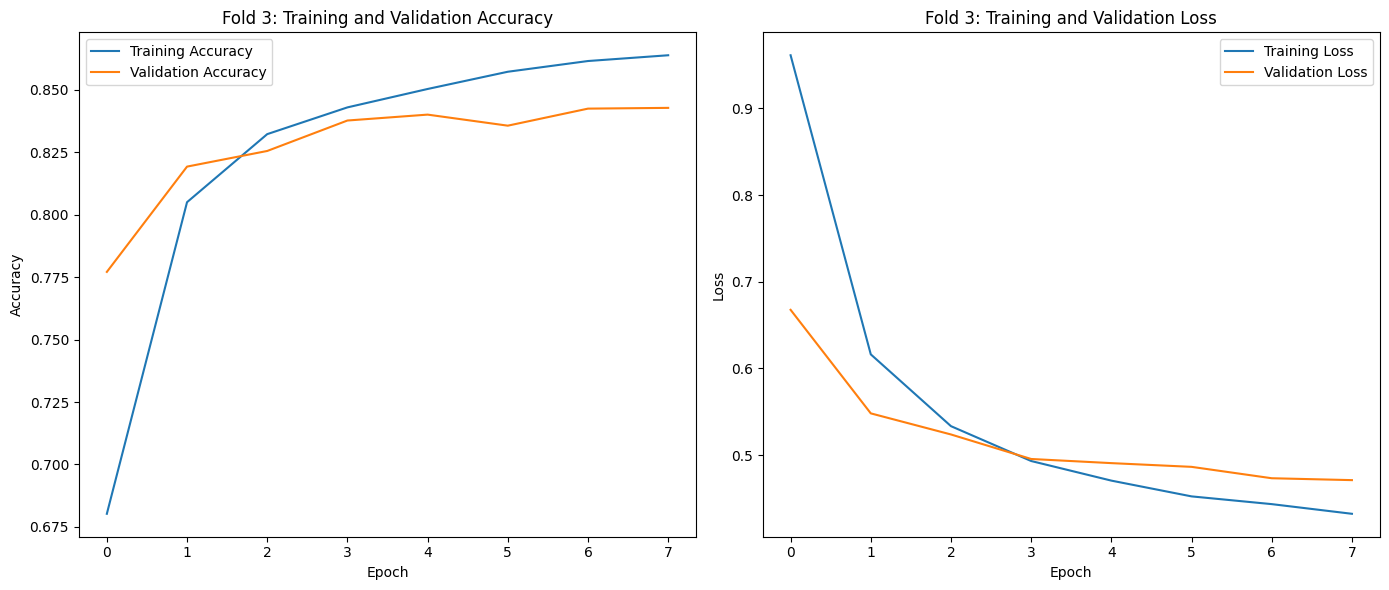

Mean Accuracy for 3 folds: 0.8406
Mean Loss for 3 folds: 0.4919

Evaluating with 5-fold cross-validation...
Epoch 1/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 168s 261ms/step - accuracy: 0.5998 - loss: 1.1939 - val_accuracy: 0.8150 - val_loss: 0.5778
Epoch 2/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 171s 268ms/step - accuracy: 0.8184 - loss: 0.5814 - val_accuracy: 0.8316 - val_loss: 0.5177
Epoch 3/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 171s 267ms/step - accuracy: 0.8270 - loss: 0.5614 - val_accuracy: 0.8324 - val_loss: 0.5072
Epoch 4/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 165s 258ms/step - accuracy: 0.8478 - loss: 0.4823 - val_accuracy: 0.8405 - val_loss: 0.4742
Epoch 5/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 177s 277ms/step - accuracy: 0.8564 - loss: 0.4550 - val_accuracy: 0.8390 - val_loss: 0.4844
Epoch 6/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 111s 173ms/step - accuracy: 0.8602 - loss: 0.4434 - val_accuracy: 0.8432 - val_loss: 0.4766
Epoch 7/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 110s 172ms/step - accuracy: 0.8623 - loss: 0.4345 - val_accuracy: 0

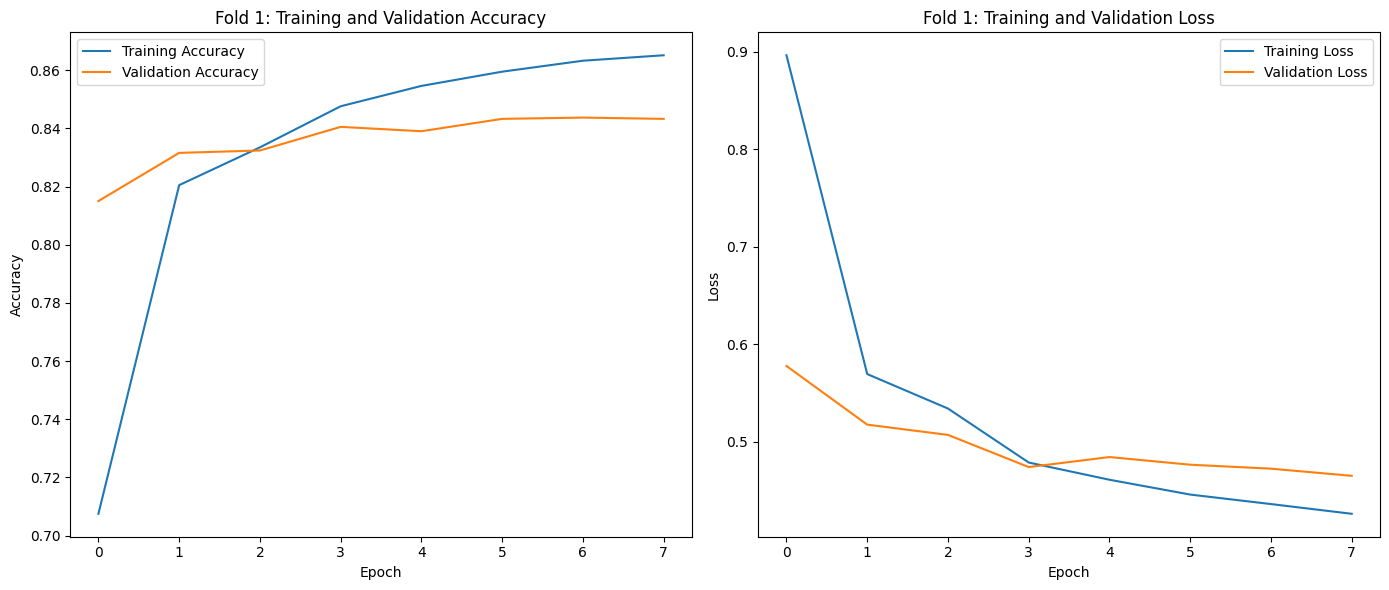

Epoch 1/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 107s 165ms/step - accuracy: 0.5704 - loss: 1.2444 - val_accuracy: 0.8056 - val_loss: 0.6140
Epoch 2/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.8163 - loss: 0.5876 - val_accuracy: 0.8300 - val_loss: 0.5234
Epoch 3/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.8367 - loss: 0.5183 - val_accuracy: 0.8341 - val_loss: 0.5137
Epoch 4/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.8436 - loss: 0.4972 - val_accuracy: 0.8378 - val_loss: 0.4904
Epoch 5/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.8531 - loss: 0.4592 - val_accuracy: 0.8441 - val_loss: 0.4762
Epoch 6/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.8588 - loss: 0.4469 - val_accuracy: 0.8487 - val_loss: 0.4651
Epoch 7/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.8600 - loss: 0.4359 - val_accuracy: 0.8488 - val_loss: 0.4642
Epoch 8/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.8634 - loss: 0

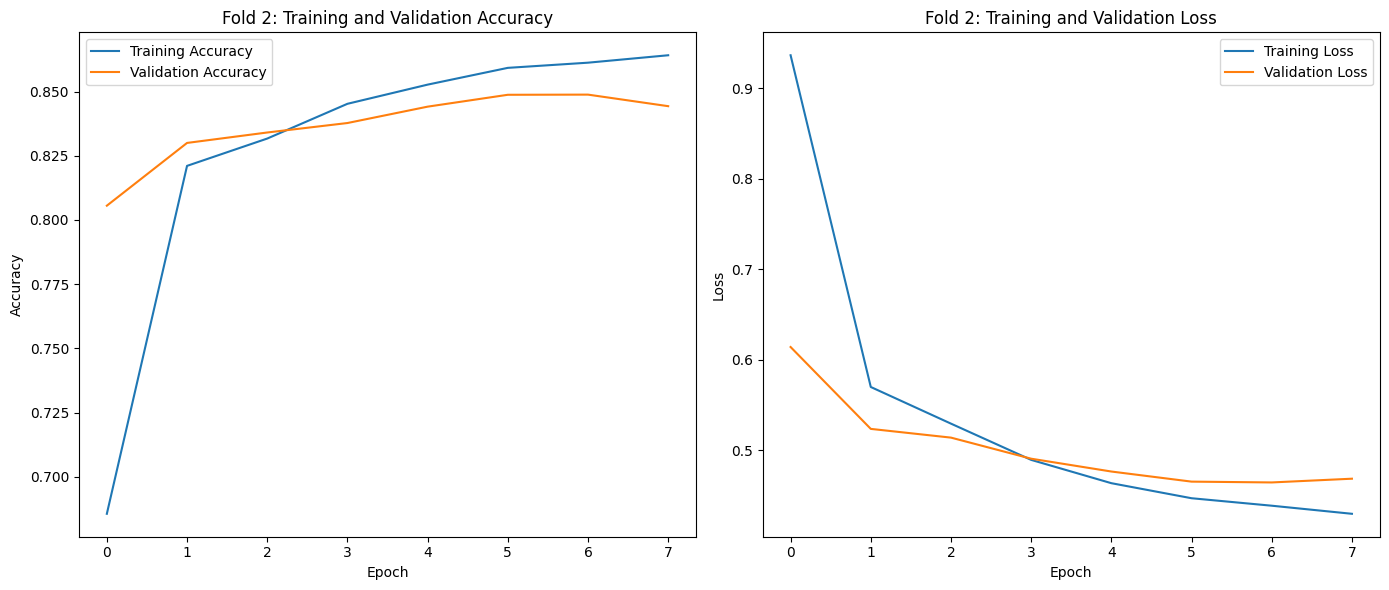

Epoch 1/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 105s 163ms/step - accuracy: 0.5627 - loss: 1.2359 - val_accuracy: 0.7981 - val_loss: 0.6108
Epoch 2/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.8124 - loss: 0.5935 - val_accuracy: 0.8046 - val_loss: 0.5830
Epoch 3/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.8342 - loss: 0.5269 - val_accuracy: 0.8332 - val_loss: 0.5186
Epoch 4/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.8467 - loss: 0.4794 - val_accuracy: 0.8413 - val_loss: 0.4750
Epoch 5/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 362s 566ms/step - accuracy: 0.8559 - loss: 0.4594 - val_accuracy: 0.8380 - val_loss: 0.4910
Epoch 6/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 89s 139ms/step - accuracy: 0.8596 - loss: 0.4446 - val_accuracy: 0.8436 - val_loss: 0.4700
Epoch 7/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 93s 146ms/step - accuracy: 0.8631 - loss: 0.4281 - val_accuracy: 0.8396 - val_loss: 0.4745
Epoch 8/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 106s 166ms/step - accuracy: 0.8658 - loss: 0.4

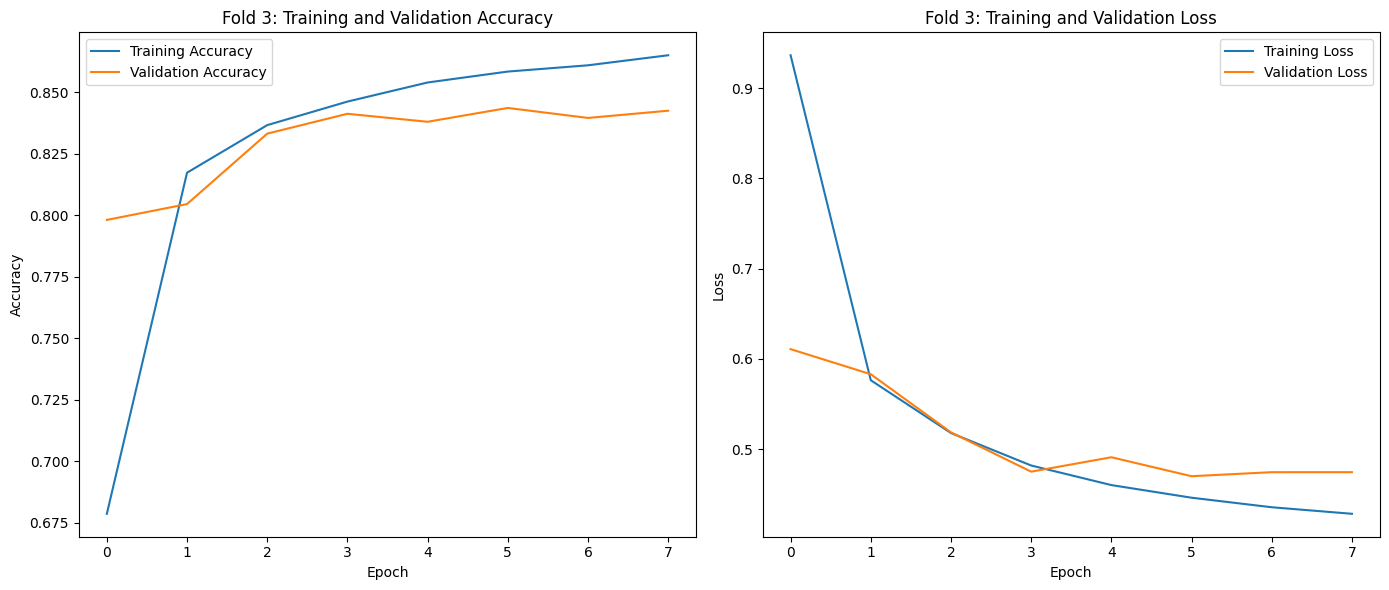

Epoch 1/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 103s 160ms/step - accuracy: 0.5629 - loss: 1.2349 - val_accuracy: 0.8075 - val_loss: 0.6111
Epoch 2/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 105s 163ms/step - accuracy: 0.8180 - loss: 0.5817 - val_accuracy: 0.8359 - val_loss: 0.5058
Epoch 3/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 107s 167ms/step - accuracy: 0.8387 - loss: 0.5088 - val_accuracy: 0.8406 - val_loss: 0.4810
Epoch 4/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 107s 167ms/step - accuracy: 0.8472 - loss: 0.4790 - val_accuracy: 0.8412 - val_loss: 0.4873
Epoch 5/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 119s 185ms/step - accuracy: 0.8545 - loss: 0.4588 - val_accuracy: 0.8440 - val_loss: 0.4674
Epoch 6/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 116s 181ms/step - accuracy: 0.8643 - loss: 0.4355 - val_accuracy: 0.8309 - val_loss: 0.4999
Epoch 7/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 115s 180ms/step - accuracy: 0.8661 - loss: 0.4304 - val_accuracy: 0.8474 - val_loss: 0.4599
Epoch 8/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.8662 - loss: 0

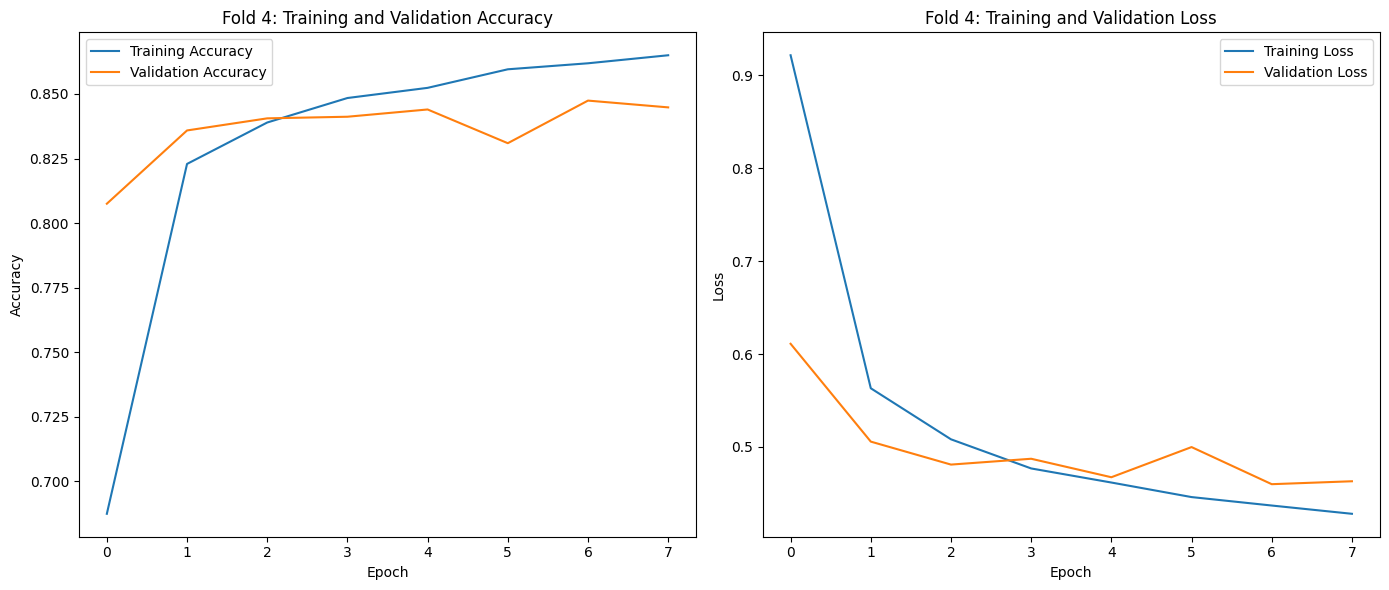

Epoch 1/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 107s 165ms/step - accuracy: 0.5375 - loss: 1.2766 - val_accuracy: 0.7799 - val_loss: 0.6552
Epoch 2/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 110s 172ms/step - accuracy: 0.7966 - loss: 0.6273 - val_accuracy: 0.8218 - val_loss: 0.5482
Epoch 3/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 110s 172ms/step - accuracy: 0.8323 - loss: 0.5247 - val_accuracy: 0.8334 - val_loss: 0.5094
Epoch 4/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 96s 150ms/step - accuracy: 0.8448 - loss: 0.4905 - val_accuracy: 0.8429 - val_loss: 0.4751
Epoch 5/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 126s 197ms/step - accuracy: 0.8566 - loss: 0.4567 - val_accuracy: 0.8338 - val_loss: 0.4977
Epoch 6/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 230s 360ms/step - accuracy: 0.8563 - loss: 0.4500 - val_accuracy: 0.8429 - val_loss: 0.4811
Epoch 7/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 100s 156ms/step - accuracy: 0.8621 - loss: 0.4362 - val_accuracy: 0.8469 - val_loss: 0.4606
Epoch 8/8
640/640 ━━━━━━━━━━━━━━━━━━━━ 118s 184ms/step - accuracy: 0.8658 - loss: 0.

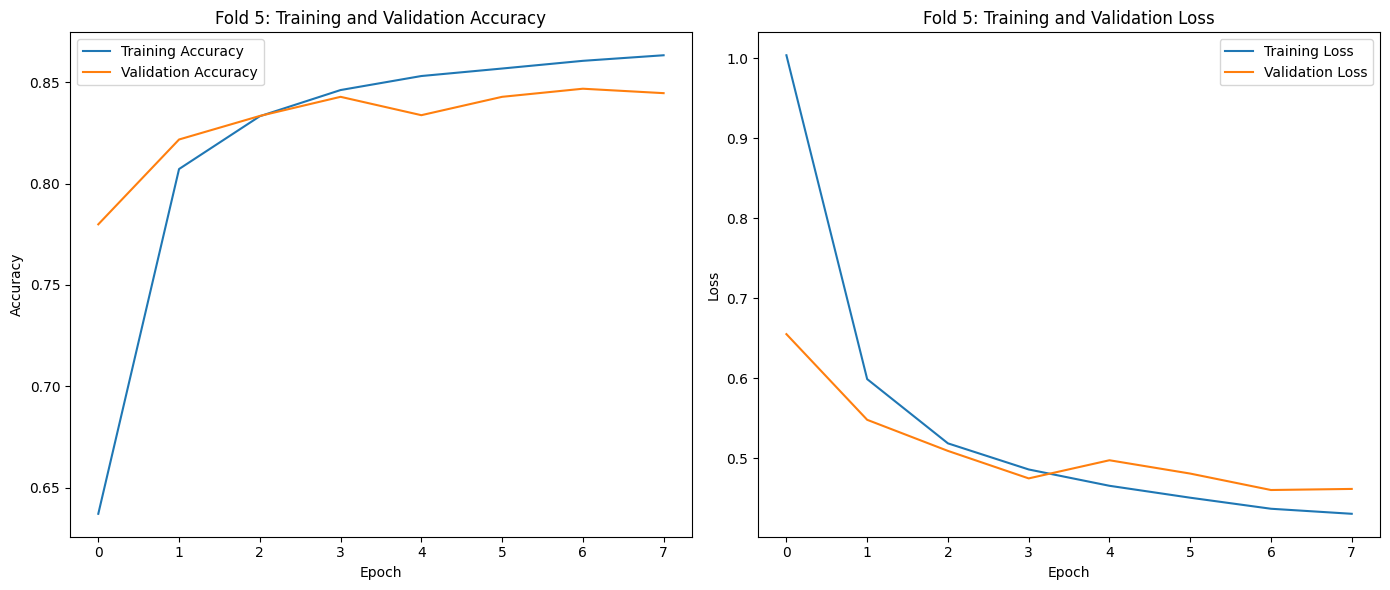

Mean Accuracy for 5 folds: 0.8439
Mean Loss for 5 folds: 0.4666

Evaluating with 10-fold cross-validation...
Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 148s 204ms/step - accuracy: 0.5671 - loss: 1.2297 - val_accuracy: 0.8201 - val_loss: 0.5757
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 105s 146ms/step - accuracy: 0.8223 - loss: 0.5740 - val_accuracy: 0.8249 - val_loss: 0.5445
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 115s 160ms/step - accuracy: 0.8401 - loss: 0.5065 - val_accuracy: 0.8410 - val_loss: 0.4825
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 314s 437ms/step - accuracy: 0.8485 - loss: 0.4781 - val_accuracy: 0.8438 - val_loss: 0.4676
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.8559 - loss: 0.4531 - val_accuracy: 0.8520 - val_loss: 0.4577
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8565 - loss: 0.4434 - val_accuracy: 0.8533 - val_loss: 0.4558
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.8639 - loss: 0.4295 - val_accuracy: 

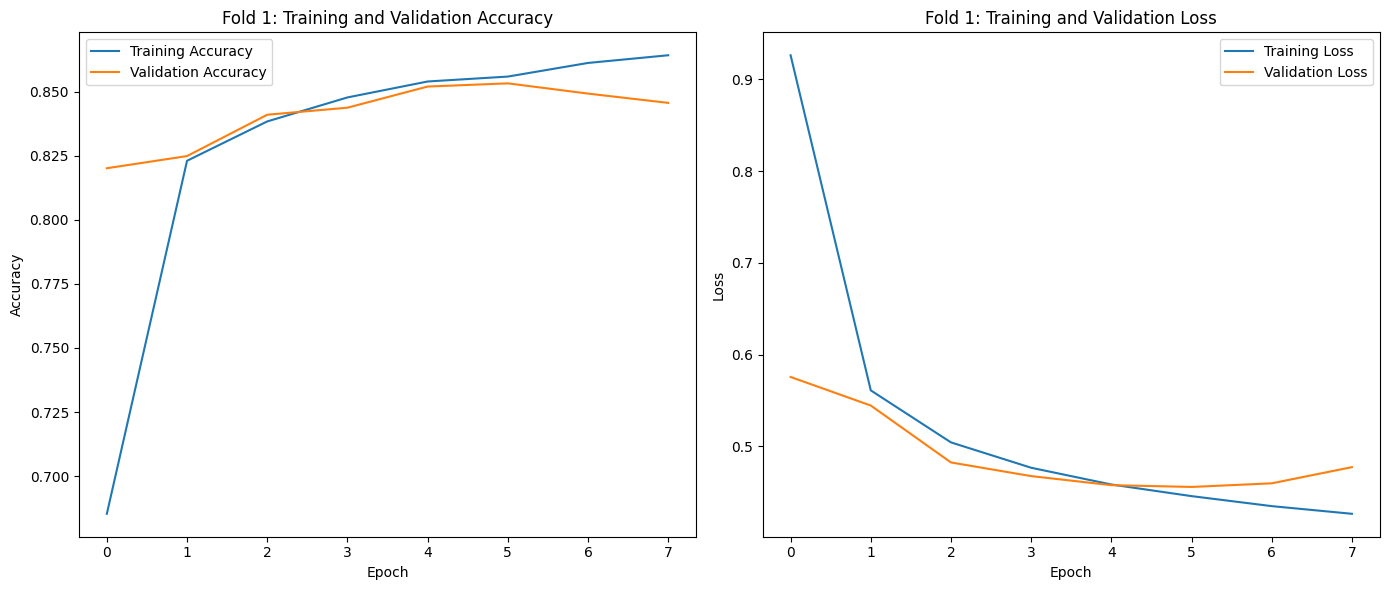

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 100s 137ms/step - accuracy: 0.5872 - loss: 1.1903 - val_accuracy: 0.7962 - val_loss: 0.6174
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 1570s 2s/step - accuracy: 0.8123 - loss: 0.5912 - val_accuracy: 0.8284 - val_loss: 0.5204
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 868s 1s/step - accuracy: 0.8351 - loss: 0.5163 - val_accuracy: 0.8360 - val_loss: 0.4959
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.8483 - loss: 0.4756 - val_accuracy: 0.8361 - val_loss: 0.5017
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 476s 662ms/step - accuracy: 0.8544 - loss: 0.4562 - val_accuracy: 0.8394 - val_loss: 0.4673
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 107s 149ms/step - accuracy: 0.8584 - loss: 0.4413 - val_accuracy: 0.8396 - val_loss: 0.4704
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 230s 320ms/step - accuracy: 0.8638 - loss: 0.4333 - val_accuracy: 0.8405 - val_loss: 0.4703
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 155s 216ms/step - accuracy: 0.8661 - loss: 0.4253

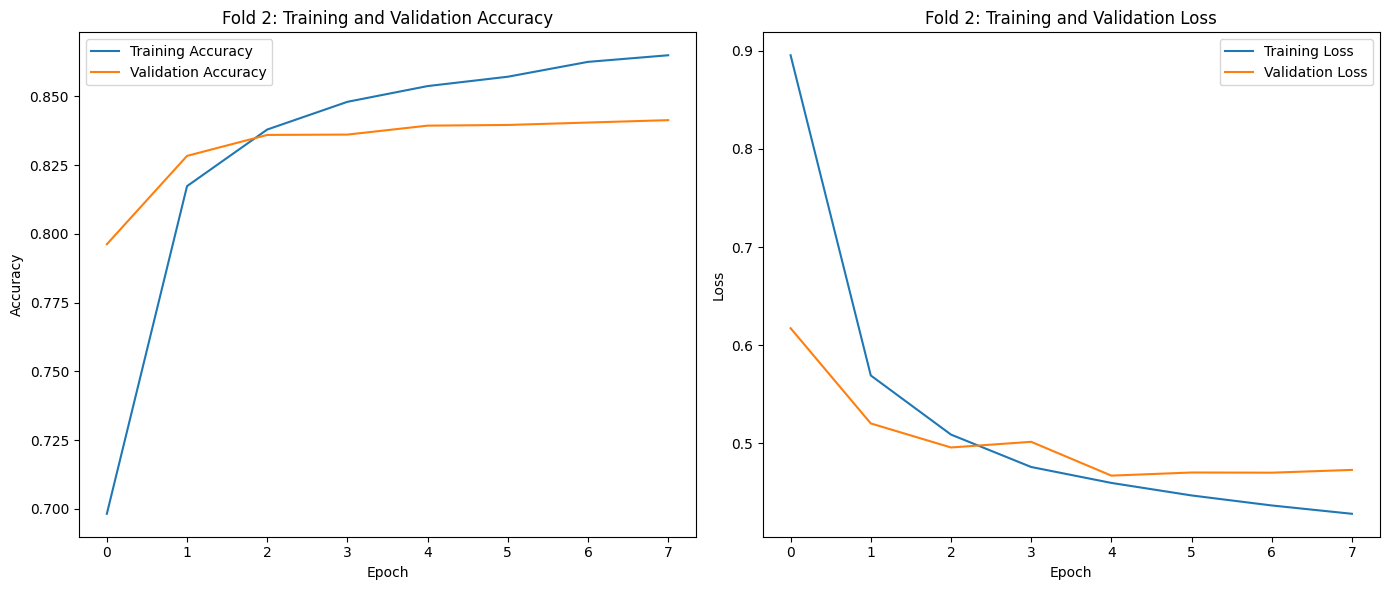

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 91s 124ms/step - accuracy: 0.5756 - loss: 1.2043 - val_accuracy: 0.8164 - val_loss: 0.5769
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 128s 178ms/step - accuracy: 0.8151 - loss: 0.5912 - val_accuracy: 0.8330 - val_loss: 0.5037
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 119s 166ms/step - accuracy: 0.8372 - loss: 0.5133 - val_accuracy: 0.8365 - val_loss: 0.4927
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 96s 133ms/step - accuracy: 0.8487 - loss: 0.4763 - val_accuracy: 0.8434 - val_loss: 0.4643
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 383s 532ms/step - accuracy: 0.8553 - loss: 0.4570 - val_accuracy: 0.8419 - val_loss: 0.4725
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 890s 1s/step - accuracy: 0.8584 - loss: 0.4447 - val_accuracy: 0.8430 - val_loss: 0.4793
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 94s 130ms/step - accuracy: 0.8647 - loss: 0.4310 - val_accuracy: 0.8434 - val_loss: 0.4754
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8659 - loss: 0.4252 

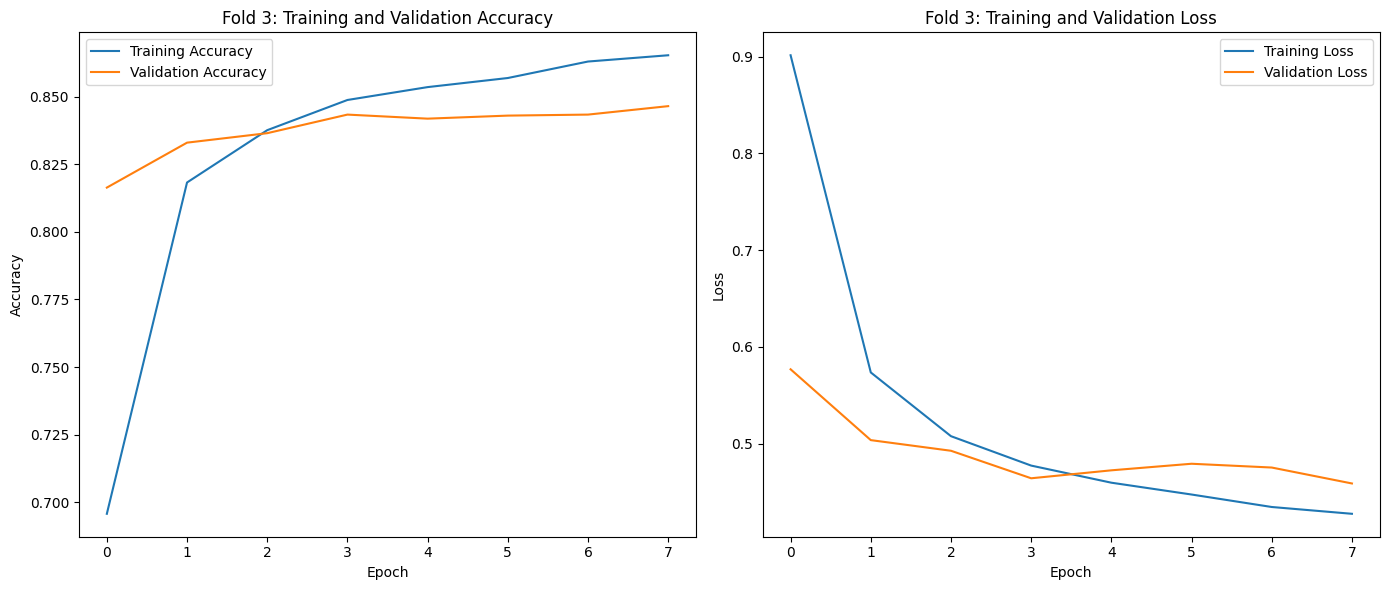

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 93s 128ms/step - accuracy: 0.5655 - loss: 1.2125 - val_accuracy: 0.7916 - val_loss: 0.6260
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 96s 133ms/step - accuracy: 0.7984 - loss: 0.6226 - val_accuracy: 0.8310 - val_loss: 0.5302
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 97s 135ms/step - accuracy: 0.8365 - loss: 0.5166 - val_accuracy: 0.8359 - val_loss: 0.4992
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 97s 135ms/step - accuracy: 0.8475 - loss: 0.4813 - val_accuracy: 0.8399 - val_loss: 0.4907
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 401s 557ms/step - accuracy: 0.8520 - loss: 0.4652 - val_accuracy: 0.8435 - val_loss: 0.4876
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 99s 137ms/step - accuracy: 0.8587 - loss: 0.4445 - val_accuracy: 0.8479 - val_loss: 0.4709
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 152ms/step - accuracy: 0.8641 - loss: 0.4325 - val_accuracy: 0.8508 - val_loss: 0.4746
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 106s 148ms/step - accuracy: 0.8660 - loss: 0.4239

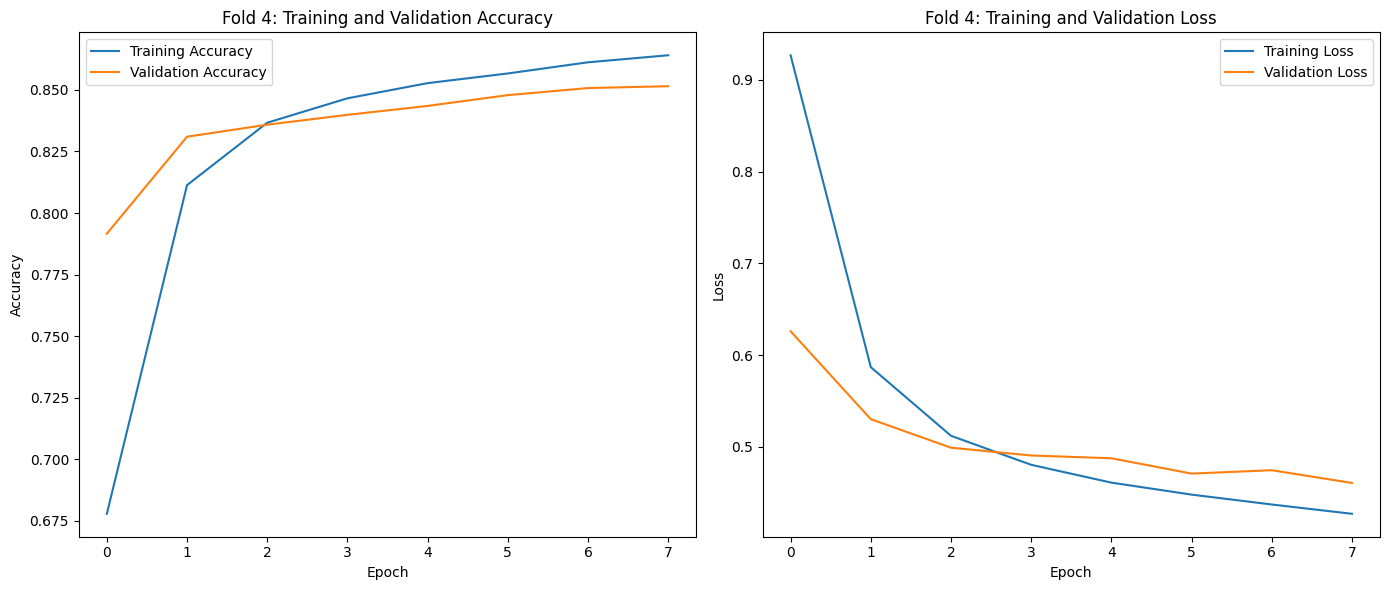

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 96s 132ms/step - accuracy: 0.5656 - loss: 1.2288 - val_accuracy: 0.8195 - val_loss: 0.5799
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 104s 144ms/step - accuracy: 0.8140 - loss: 0.5874 - val_accuracy: 0.8250 - val_loss: 0.5251
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.8396 - loss: 0.5076 - val_accuracy: 0.8363 - val_loss: 0.4869
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 106s 147ms/step - accuracy: 0.8481 - loss: 0.4761 - val_accuracy: 0.8482 - val_loss: 0.4629
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 149s 208ms/step - accuracy: 0.8558 - loss: 0.4545 - val_accuracy: 0.8474 - val_loss: 0.4555
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 103s 143ms/step - accuracy: 0.8549 - loss: 0.4541 - val_accuracy: 0.8514 - val_loss: 0.4476
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.8623 - loss: 0.4405 - val_accuracy: 0.8558 - val_loss: 0.4458
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.8652 - loss: 0.

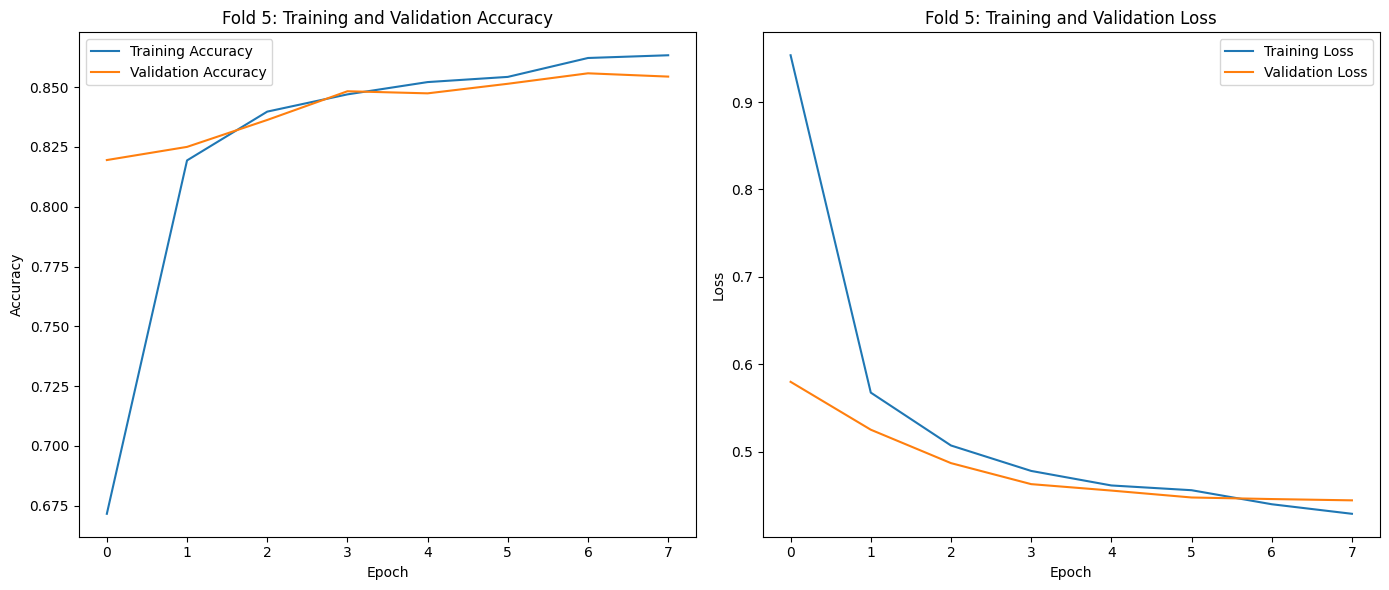

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 106s 145ms/step - accuracy: 0.6117 - loss: 1.1652 - val_accuracy: 0.8125 - val_loss: 0.5796
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.8231 - loss: 0.5663 - val_accuracy: 0.8242 - val_loss: 0.5320
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 108s 150ms/step - accuracy: 0.8361 - loss: 0.5160 - val_accuracy: 0.8388 - val_loss: 0.4958
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 108s 150ms/step - accuracy: 0.8476 - loss: 0.4806 - val_accuracy: 0.8370 - val_loss: 0.4793
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 152ms/step - accuracy: 0.8470 - loss: 0.4883 - val_accuracy: 0.8455 - val_loss: 0.4693
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.8601 - loss: 0.4445 - val_accuracy: 0.8367 - val_loss: 0.4801
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8643 - loss: 0.4297 - val_accuracy: 0.8430 - val_loss: 0.4759
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 112s 156ms/step - accuracy: 0.8660 - loss: 0

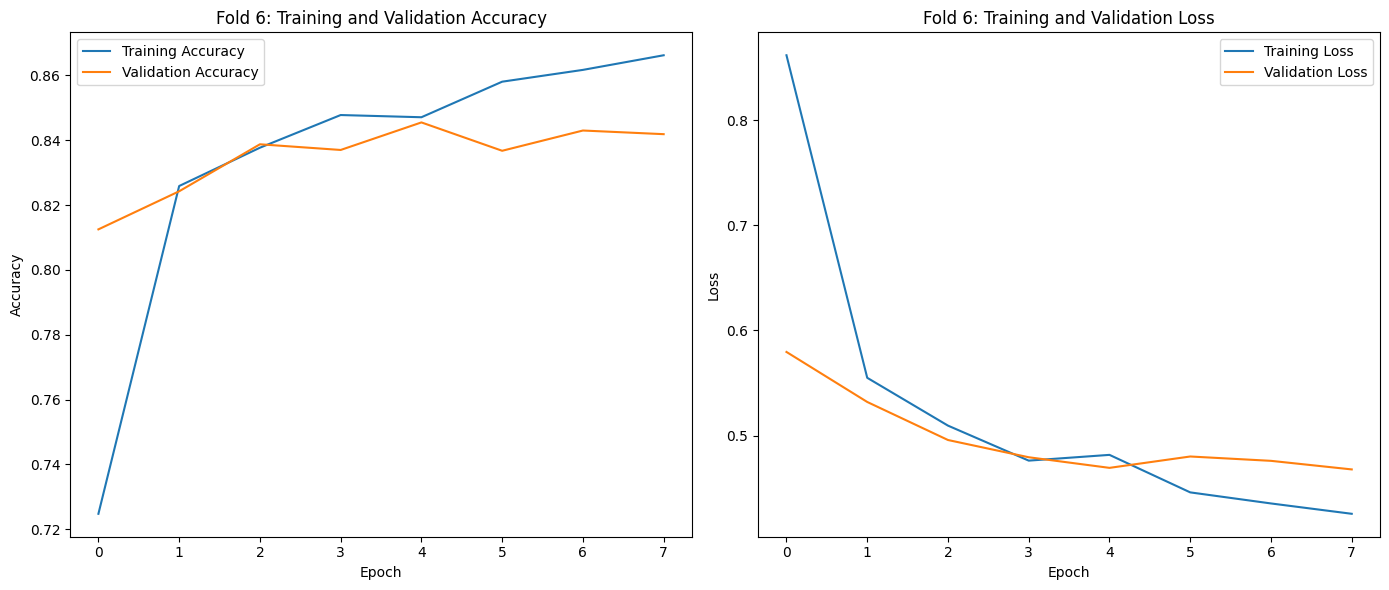

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 107s 147ms/step - accuracy: 0.5820 - loss: 1.1857 - val_accuracy: 0.8131 - val_loss: 0.5816
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.8120 - loss: 0.5976 - val_accuracy: 0.8290 - val_loss: 0.5160
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8371 - loss: 0.5164 - val_accuracy: 0.8307 - val_loss: 0.4907
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 152ms/step - accuracy: 0.8479 - loss: 0.4790 - val_accuracy: 0.8300 - val_loss: 0.4929
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 152ms/step - accuracy: 0.8522 - loss: 0.4594 - val_accuracy: 0.8416 - val_loss: 0.4773
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.8577 - loss: 0.4474 - val_accuracy: 0.8431 - val_loss: 0.4573
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8629 - loss: 0.4344 - val_accuracy: 0.8422 - val_loss: 0.4749
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.8665 - loss: 0

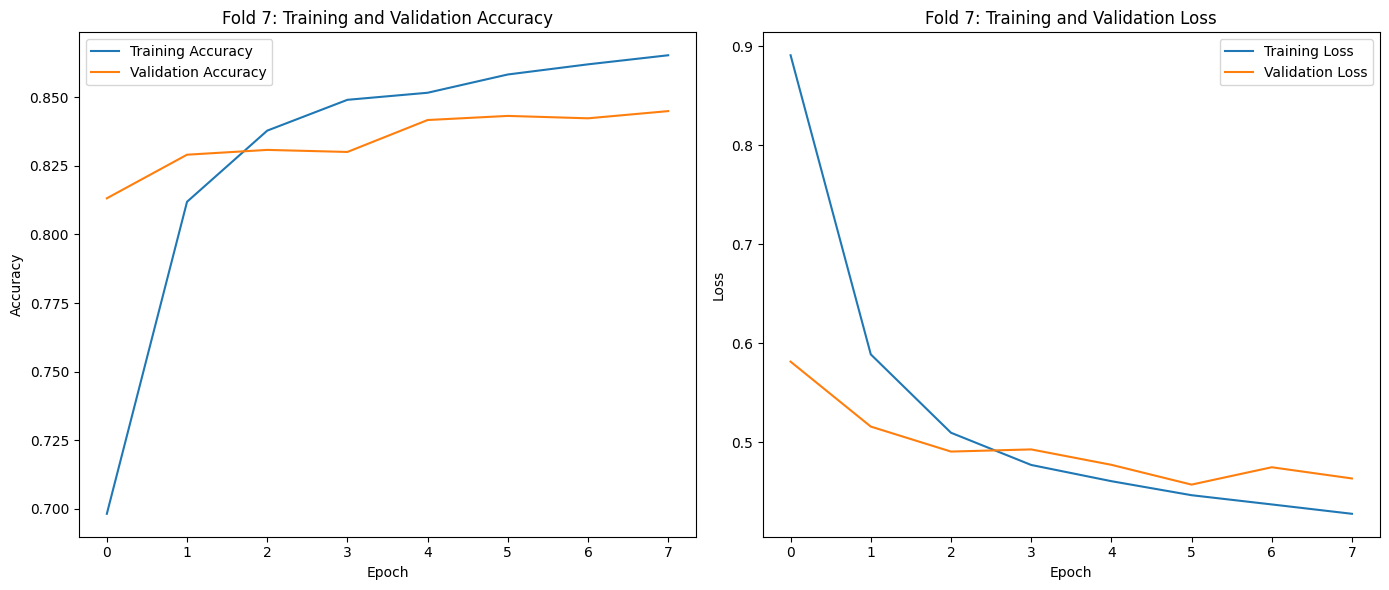

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 108s 149ms/step - accuracy: 0.5812 - loss: 1.2200 - val_accuracy: 0.8226 - val_loss: 0.5571
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8200 - loss: 0.5771 - val_accuracy: 0.8351 - val_loss: 0.5121
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 153ms/step - accuracy: 0.8387 - loss: 0.5130 - val_accuracy: 0.8396 - val_loss: 0.4881
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.8485 - loss: 0.4769 - val_accuracy: 0.8441 - val_loss: 0.4754
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.8562 - loss: 0.4566 - val_accuracy: 0.8490 - val_loss: 0.4559
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.8620 - loss: 0.4425 - val_accuracy: 0.8504 - val_loss: 0.4483
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.8629 - loss: 0.4288 - val_accuracy: 0.8508 - val_loss: 0.4504
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.8647 - loss: 0

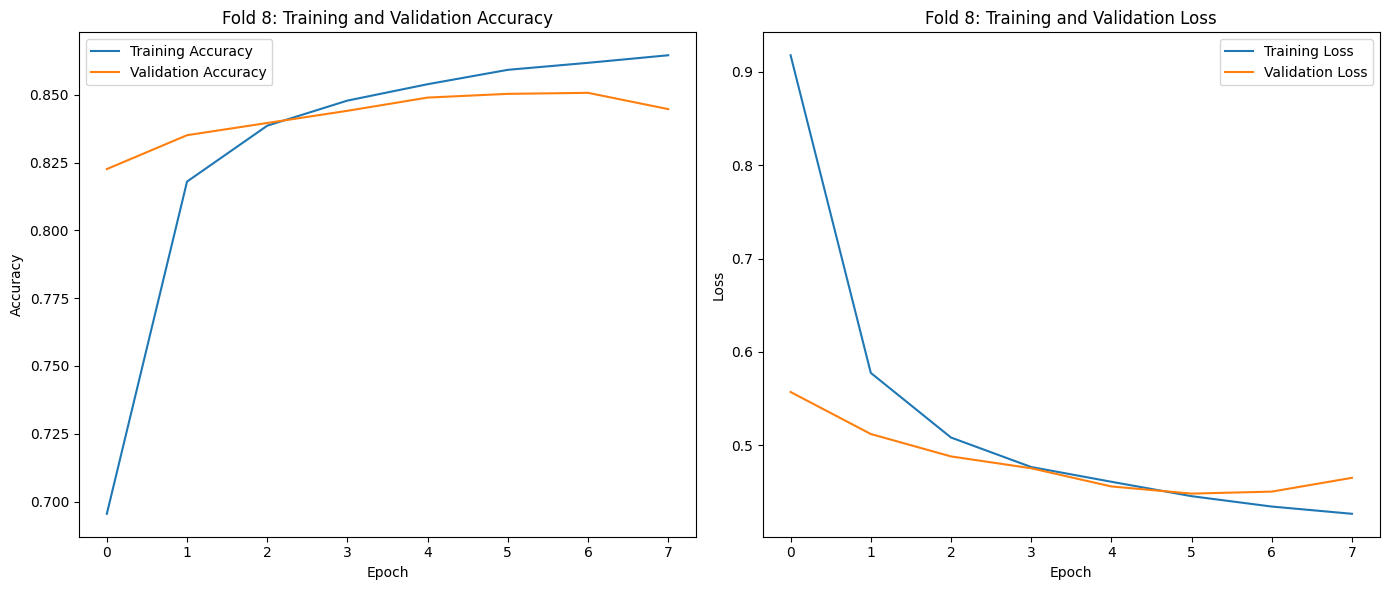

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 108s 149ms/step - accuracy: 0.5446 - loss: 1.2296 - val_accuracy: 0.8217 - val_loss: 0.5769
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8207 - loss: 0.5728 - val_accuracy: 0.8282 - val_loss: 0.5193
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 112s 156ms/step - accuracy: 0.8398 - loss: 0.5019 - val_accuracy: 0.8405 - val_loss: 0.4908
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 110s 153ms/step - accuracy: 0.8499 - loss: 0.4716 - val_accuracy: 0.8380 - val_loss: 0.4912
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 112s 155ms/step - accuracy: 0.8572 - loss: 0.4509 - val_accuracy: 0.8446 - val_loss: 0.4765
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 112s 156ms/step - accuracy: 0.8588 - loss: 0.4410 - val_accuracy: 0.8359 - val_loss: 0.4799
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.8662 - loss: 0.4258 - val_accuracy: 0.8395 - val_loss: 0.4763
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.8697 - loss: 0

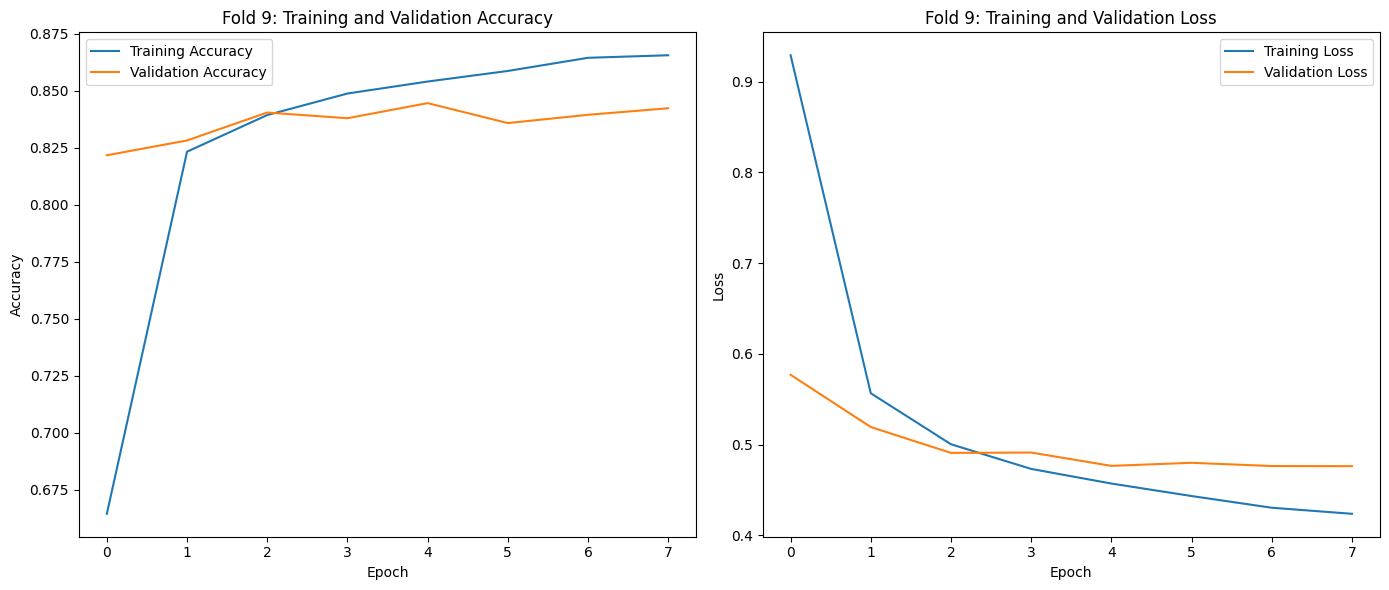

Epoch 1/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 111s 152ms/step - accuracy: 0.5805 - loss: 1.2009 - val_accuracy: 0.7926 - val_loss: 0.6291
Epoch 2/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 113s 156ms/step - accuracy: 0.8054 - loss: 0.6139 - val_accuracy: 0.8355 - val_loss: 0.5107
Epoch 3/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 239s 332ms/step - accuracy: 0.8364 - loss: 0.5156 - val_accuracy: 0.8415 - val_loss: 0.4775
Epoch 4/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 298s 413ms/step - accuracy: 0.8488 - loss: 0.4808 - val_accuracy: 0.8474 - val_loss: 0.4622
Epoch 5/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 299s 415ms/step - accuracy: 0.8546 - loss: 0.4545 - val_accuracy: 0.8480 - val_loss: 0.4546
Epoch 6/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 298s 414ms/step - accuracy: 0.8564 - loss: 0.4480 - val_accuracy: 0.8479 - val_loss: 0.4461
Epoch 7/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 298s 413ms/step - accuracy: 0.8609 - loss: 0.4398 - val_accuracy: 0.8420 - val_loss: 0.4666
Epoch 8/8
720/720 ━━━━━━━━━━━━━━━━━━━━ 298s 414ms/step - accuracy: 0.8658 - loss: 0

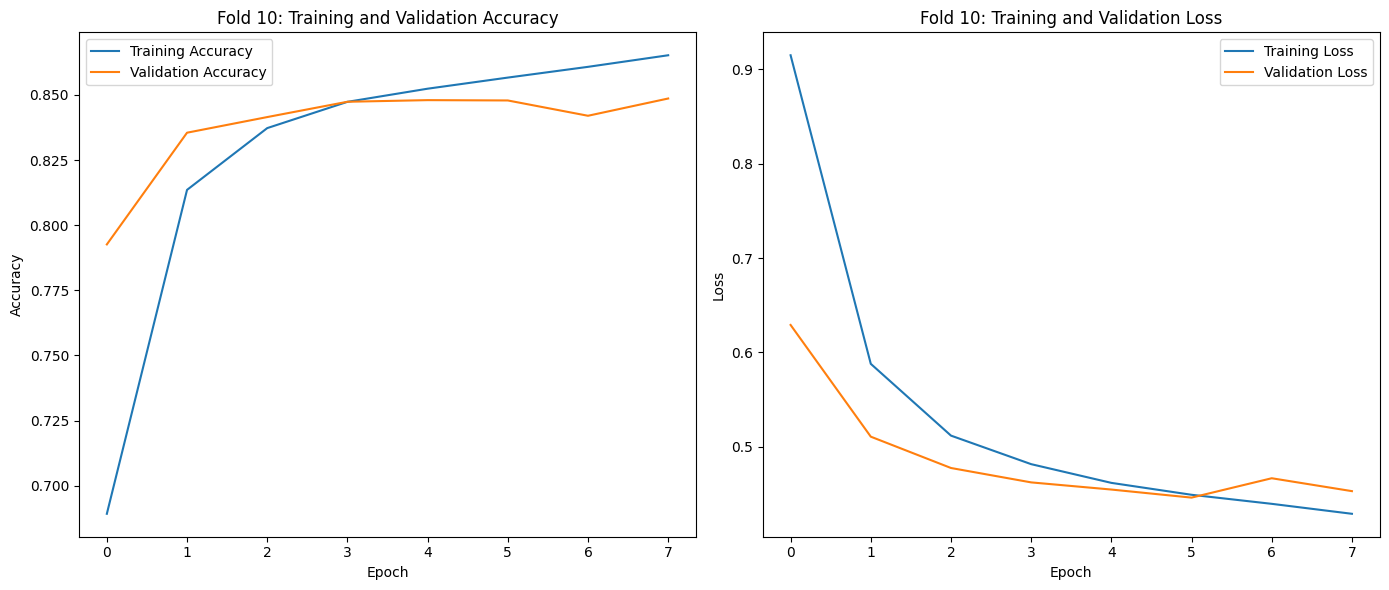

Mean Accuracy for 10 folds: 0.8462
Mean Loss for 10 folds: 0.4640


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Define a function to build the LSTM model with L2 regularization
def create_model():
    model = Sequential()
    model.add(Embedding(5000, 128, input_length=max_length))  # Add Embedding layer
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.001))))  # L2 regularization
    model.add(Dropout(0.3))
    model.add(Dense(70, activation='tanh', kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(Dropout(0.2))
    model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(Dropout(0.2))
    model.add(Dense(13, activation='tanh', kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(Dropout(0.1))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax', kernel_regularizer=l2(0.001)))  # Output layer
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Define function for cross-validation
def evaluate_model(X, y, n_splits):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_losses = []

    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Build and train the model
        model = create_model()
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=100, verbose=1)

        # Evaluate the model
        loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracies.append(accuracy)
        fold_losses.append(loss)

        # Plotting training & validation accuracy/loss for each fold
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {len(fold_accuracies)}: Training and Validation Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Fold {len(fold_accuracies)}: Training and Validation Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return fold_accuracies, fold_losses

# 7. Evaluate the model with 3-fold, 5-fold, and 10-fold cross-validation
for n_folds in [3, 5, 10]:
    print(f"\nEvaluating with {n_folds}-fold cross-validation...")
    accuracies, losses = evaluate_model(X_padded, y_encoded, n_splits=n_folds)
    print(f"Mean Accuracy for {n_folds} folds: {np.mean(accuracies):.4f}")
    print(f"Mean Loss for {n_folds} folds: {np.mean(losses):.4f}")


In [1]:
import pandas as pd

# Creating the data
data = {
    "Model": [
        "LightGBM", "Bi-LSTM", "SVM (RBF Kernel)", "Bi-GRU", 
        "SVM (Linear Kernel)", "CatBoost", "Logistic Regression", 
        "Random Forest", "LSTM", "GRU"
    ],
    "Test Accuracy (%)": [
        86.00, 84.62, 84.59, 84.12, 84.08, 84.00, 83.00, 80.00, 79.24, 79.16
    ],
    "Analysis": [
        "Top performer due to its efficiency with large datasets, handling categorical data well, and gradient boosting framework reducing overfitting.",
        "Excels in sequential data, capturing both past and future context with its bidirectional architecture, effective for time-dependent events.",
        "Strong performance due to its ability to capture complex non-linear relationships, offering good class separation and robustness against outliers.",
        "Efficient for sequential data, slightly underperforming Bi-LSTM due to fewer parameters and less ability to capture long-term dependencies.",
        "Simplicity and speed give it a competitive edge, but underperforms compared to the RBF kernel due to its linear nature, missing non-linear relationships.",
        "Good performance with gradient boosting, especially for datasets with categorical features, reducing overfitting and performing robustly in general tasks.",
        "Good baseline model offering simplicity but limited by its linear nature and inability to capture complex patterns like sequential dependencies.",
        "Lower accuracy likely due to overfitting, as Random Forest can struggle to generalize, especially when the model does not capture sequential patterns.",
        "Underperforms compared to Bi-LSTM due to lacking bidirectionality, limiting its ability to fully capture both past and future dependencies in sequential data.",
        "Similar to LSTM, with similar limitations in capturing sequential dependencies. It is efficient but less accurate in this context compared to Bi-LSTM."
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Sorting by Test Accuracy
df_sorted = df.sort_values(by="Test Accuracy (%)", ascending=False).reset_index(drop=True)

# Displaying the sorted DataFrame
df_sorted


,Model,Test Accuracy (%),Analysis
0,LightGBM,86.00,Top performer due to its efficiency with large...
1,Bi-LSTM,84.62,"Excels in sequential data, capturing both past..."
2,SVM (RBF Kernel),84.59,Strong performance due to its ability to captu...
3,Bi-GRU,84.12,"Efficient for sequential data, slightly underp..."
4,SVM (Linear Kernel),84.08,Simplicity and speed give it a competitive edg...
5,CatBoost,84.00,"Good performance with gradient boosting, espec..."
6,Logistic Regression,83.00,Good baseline model offering simplicity but li...
7,Random Forest,80.00,"Lower accuracy likely due to overfitting, as R..."
8,LSTM,79.24,Underperforms compared to Bi-LSTM due to lacki...
9,GRU,79.16,"Similar to LSTM, with similar limitations in c..."
